# 1. Problem Statement


# 1.1. Introduction
# Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

# Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.



# 2. Import Libraries and Data

In [3]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# evaluations
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)



In [4]:

data = pd.read_csv('marketing_campaign.csv', sep="\t")

In [5]:

data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


#Dataset Features
# People:

# ID: Customer's unique identifier
# Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
# Products:

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion:

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place:

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

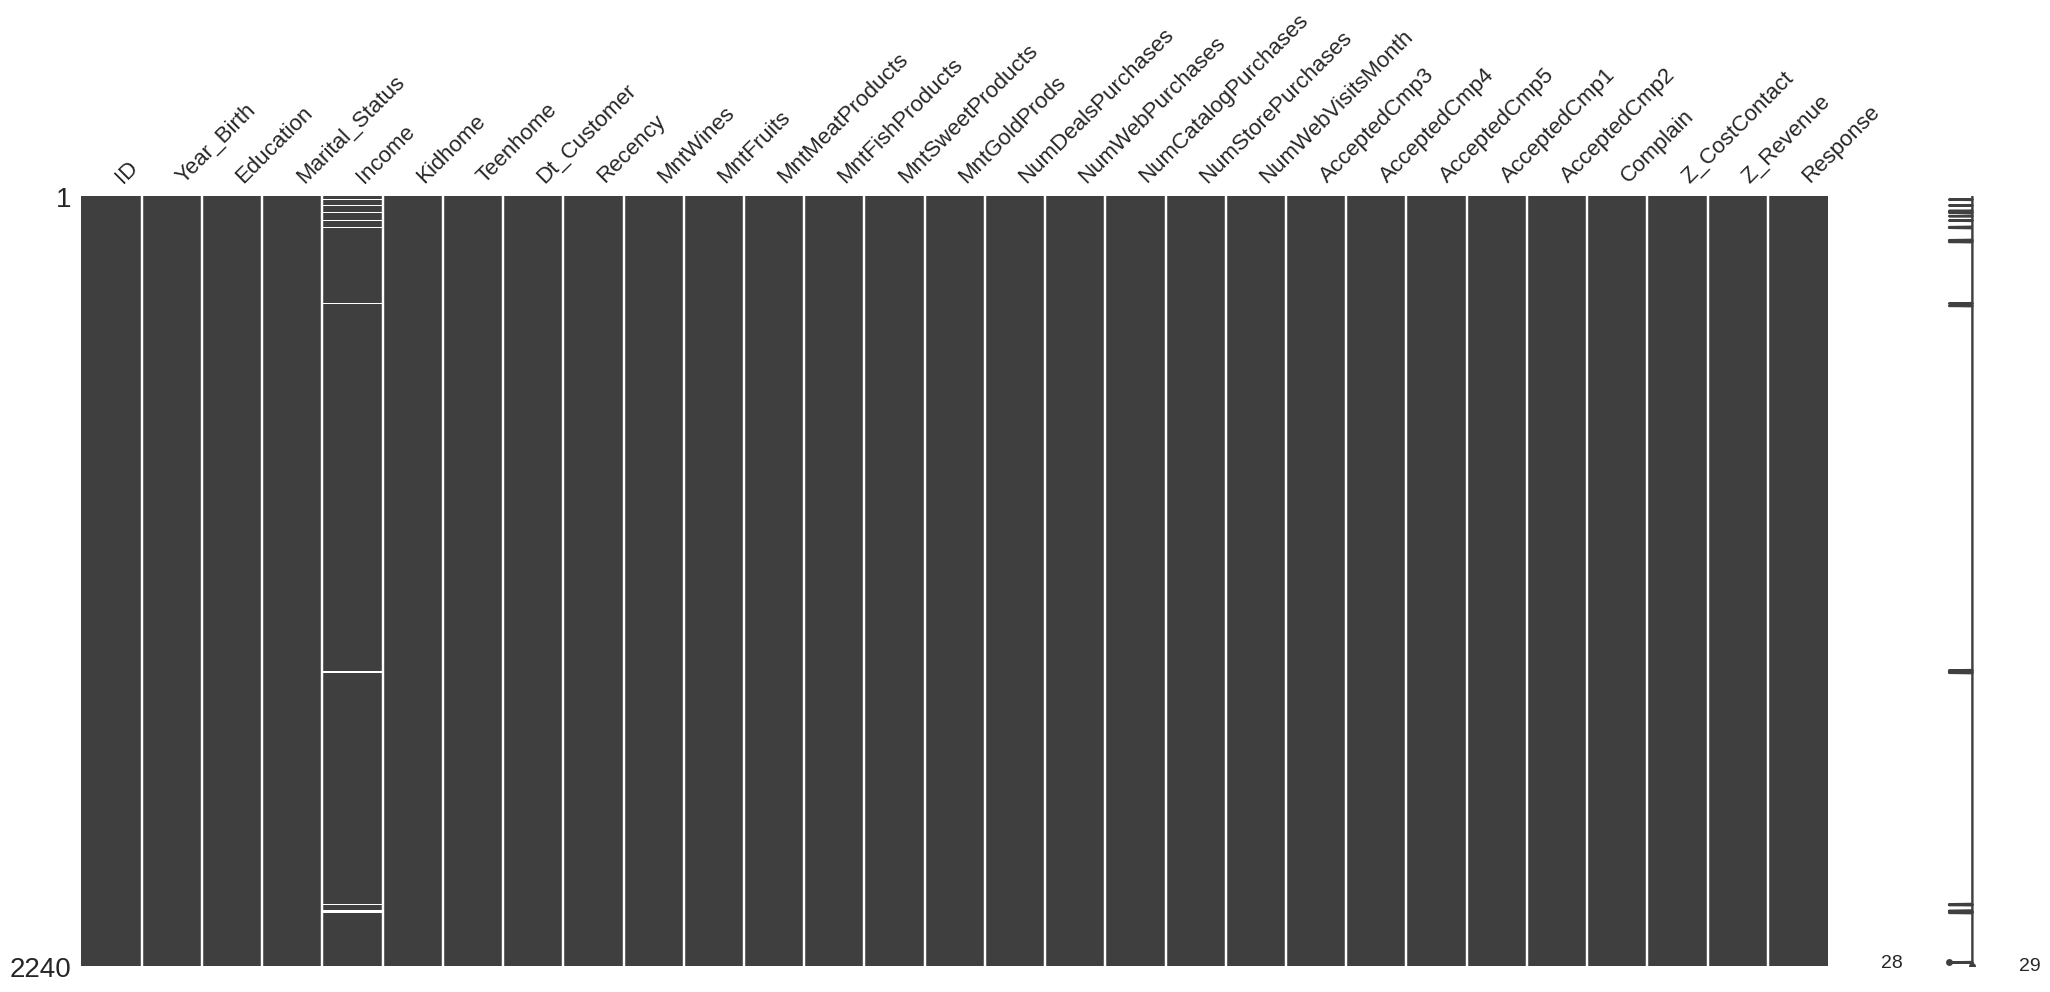

In [6]:
msno.matrix(data);


# 3. Handling Missing Values

In [7]:

data = data.dropna()

In [8]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [9]:
data.duplicated().sum()

0

## 4**. Feature Engineering**

In [10]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [11]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y', dayfirst=True)


In [12]:

print("The newest customer's enrolment date in the records:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(data['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [13]:

data['Age'] = 2015 - data['Year_Birth']

In [14]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']


In [15]:
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})


In [16]:

data['Children'] = data['Kidhome'] + data['Teenhome']

In [17]:
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']

In [18]:

data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

In [19]:
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})


In [20]:

to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)

In [21]:

data.head(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,776,Partner,0,2,0


## 5. Data Analysis and Visualization

In [22]:


data.shape

(2216, 29)

In [23]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

In [24]:

data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,46.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,122.000000,2525.000000,3.000000,5.000000,1.000000


In [25]:

data.describe(include=object).T

,count,unique,top,freq
Education,2216,3,Graduate,1116
Living_With,2216,2,Partner,1430


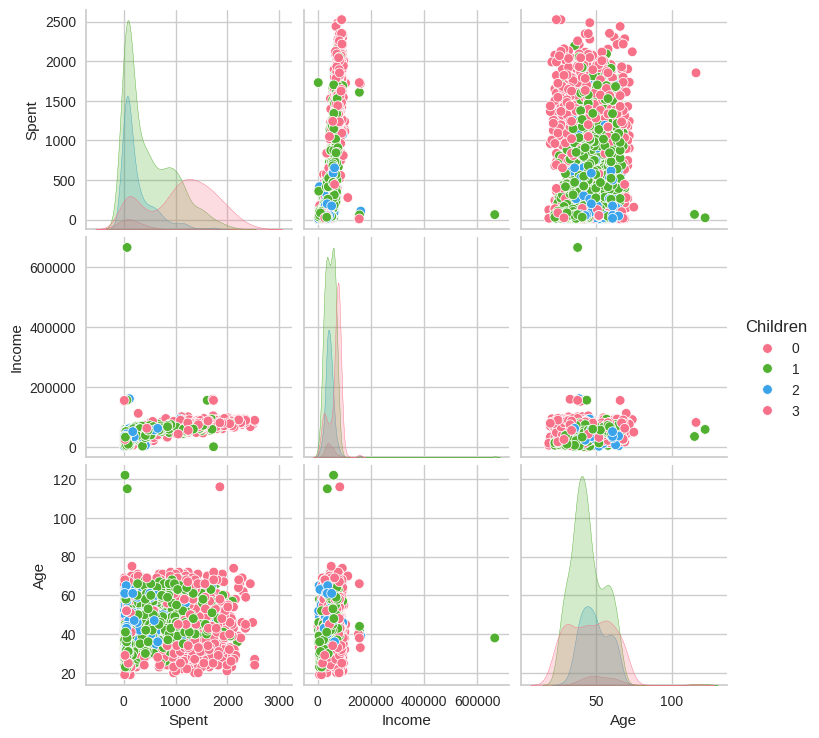

In [26]:
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

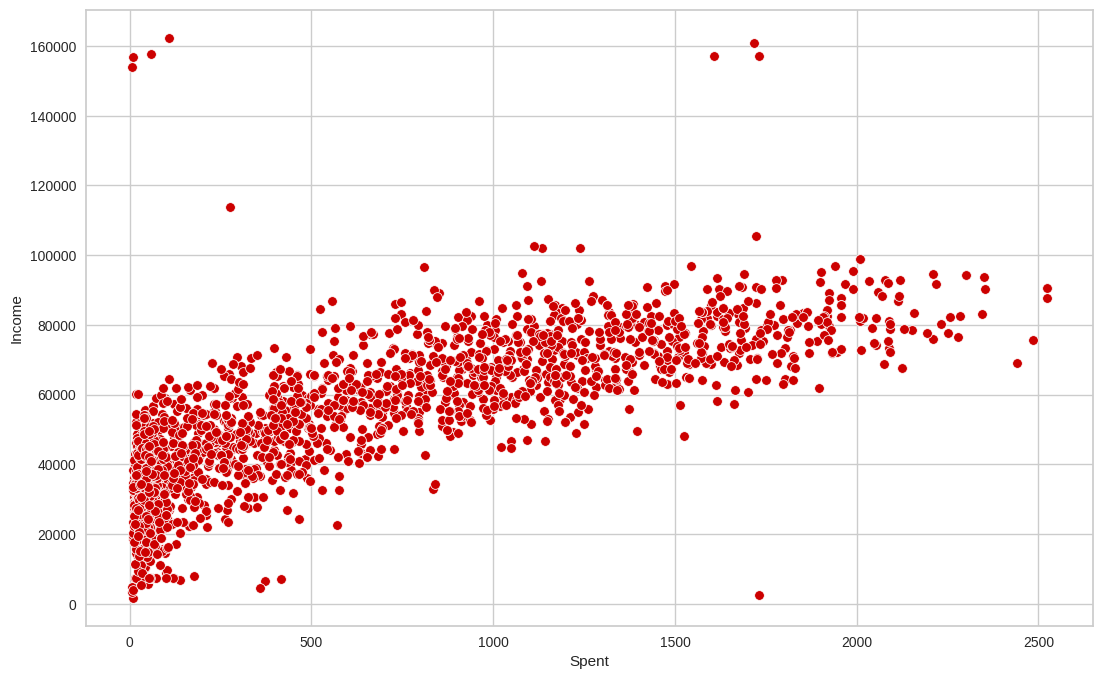

In [27]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#cc0000');

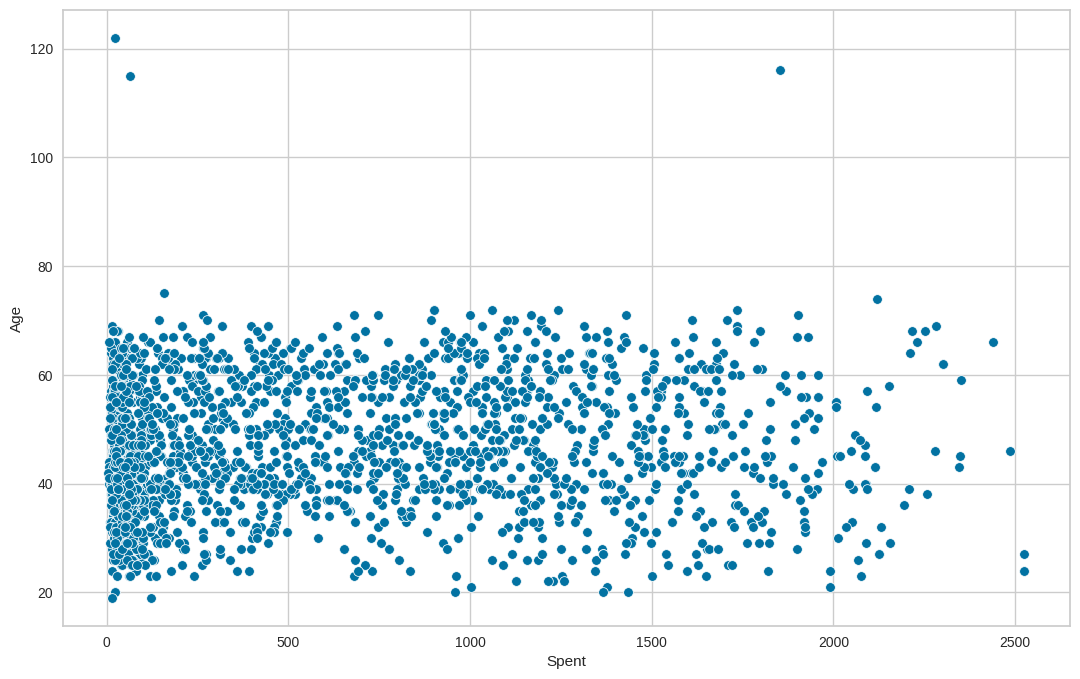

In [28]:

plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['Age']);

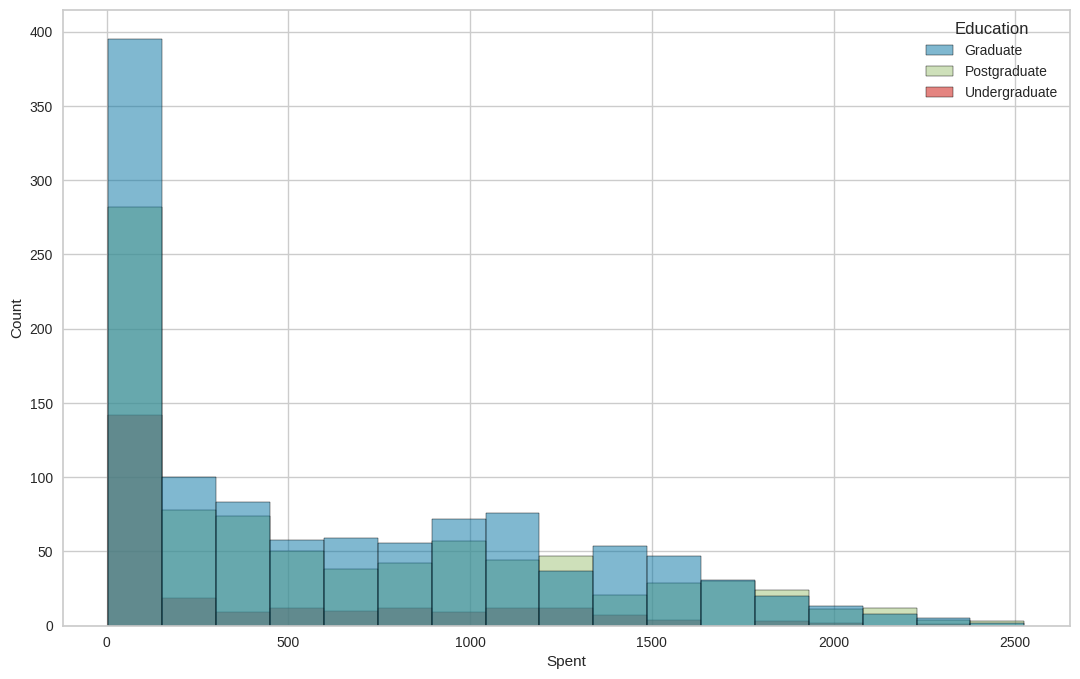

In [29]:

plt.figure(figsize=(13,8))
sns.histplot(x=data['Spent'], hue=data['Education']);

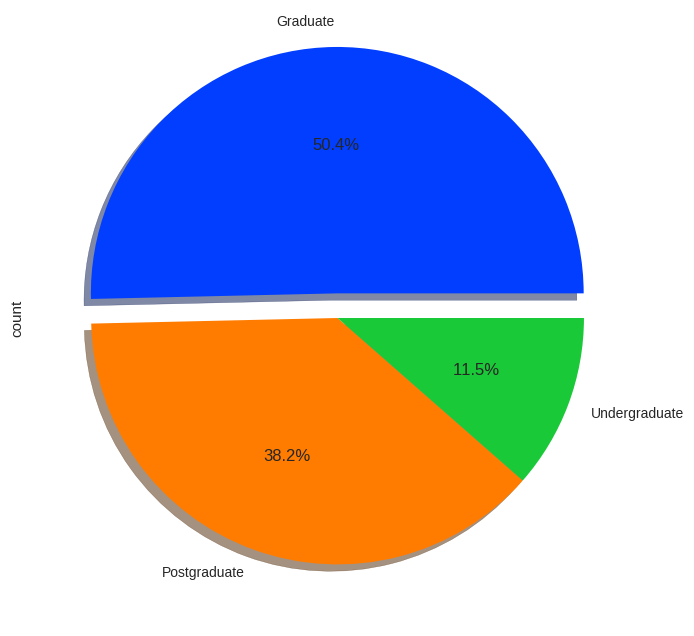

In [30]:
data['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'));


### 6. Outlier Detection

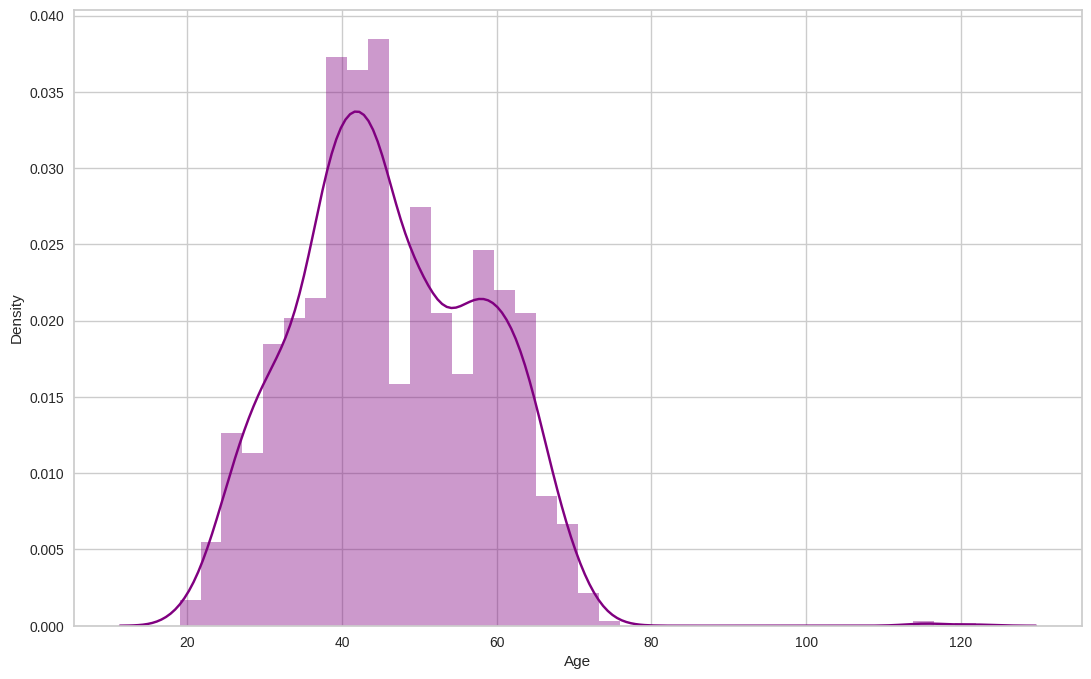

In [31]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='purple');

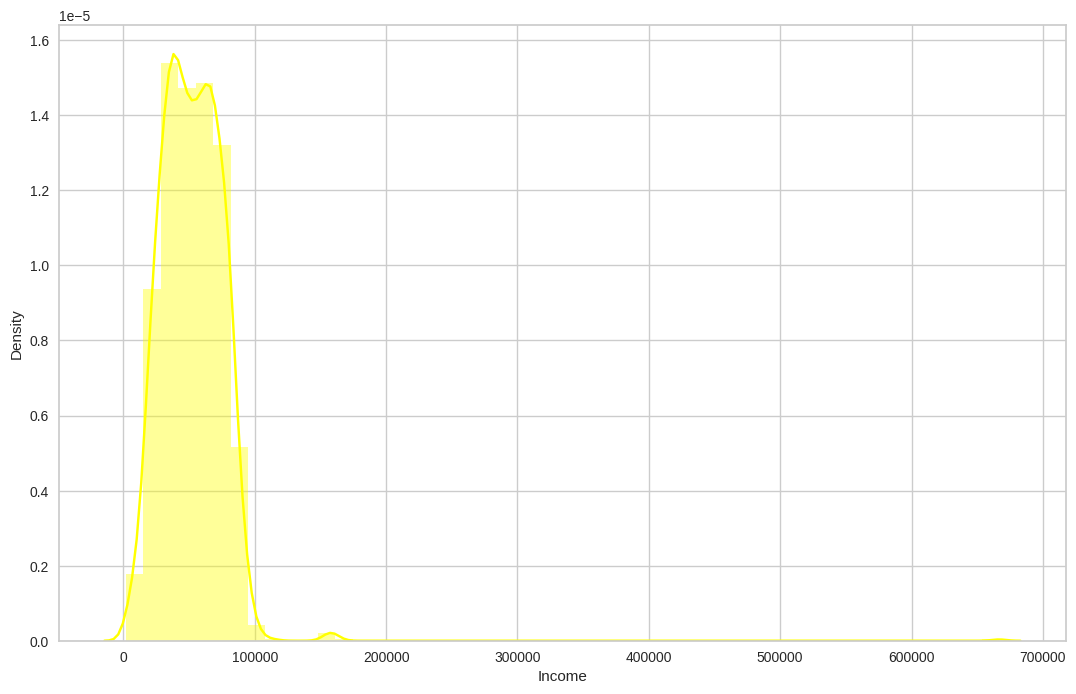

In [32]:

plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='Yellow');

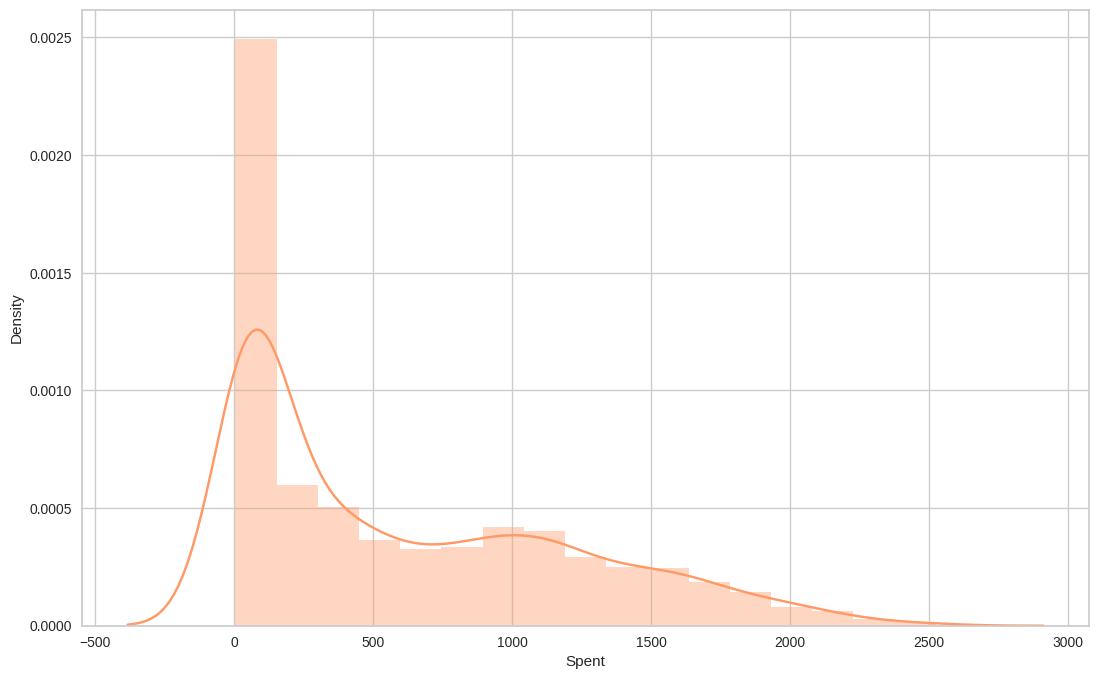

In [33]:

plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='#ff9966');

In [34]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data['Age'], notched=True, name='Age', marker_color = '#6699ff',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=data['Income'], notched=True, name='Income', marker_color = '#ff0066',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=data['Spent'], notched=True, name='Spent', marker_color = 'lightseagreen',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='Box Plots for Numerical Variables')

fig.show()



In [35]:

data.head(1)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1617,Alone,0,1,0


In [36]:

numerical = ['Income', 'Recency', 'Age', 'Spent']

In [37]:

def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(data[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data[i][(data[i] > ul) | (data[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')


In [38]:

detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    115
239    122
339    116
Name: Age, dtype: int64 

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



In [39]:

data = data[(data['Age']<100)]
data = data[(data['Income']<600000)]

In [40]:

data.shape

(2212, 29)

### 7. Check for Rare Categories


Some categories may appear a lot in the dataset, whereas some other categories appear only in a few number of observations.

Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.
Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set.
Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it.

In [41]:
categorical = [var for var in data.columns if data[var].dtype=='O']

In [42]:

# check the number of different labels
for var in categorical:
    print(data[var].value_counts() / float(len(data)))
    print()
    print()

Education
Graduate         0.504069
Postgraduate     0.382007
Undergraduate    0.113924
Name: count, dtype: float64


Living_With
Partner    0.64557
Alone      0.35443
Name: count, dtype: float64




### 7. Categorical Variables Encoding

In [43]:
data['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

In [44]:
data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})


In [45]:
data['Living_With'] = data['Living_With'].map({'Alone':0,'Partner':1})


In [46]:

data.dtypes

,0
Education,int64
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64


In [47]:

data.head(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1617,0,0,1,0
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,27,0,2,3,1
2,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,776,1,0,2,0


<Axes: >

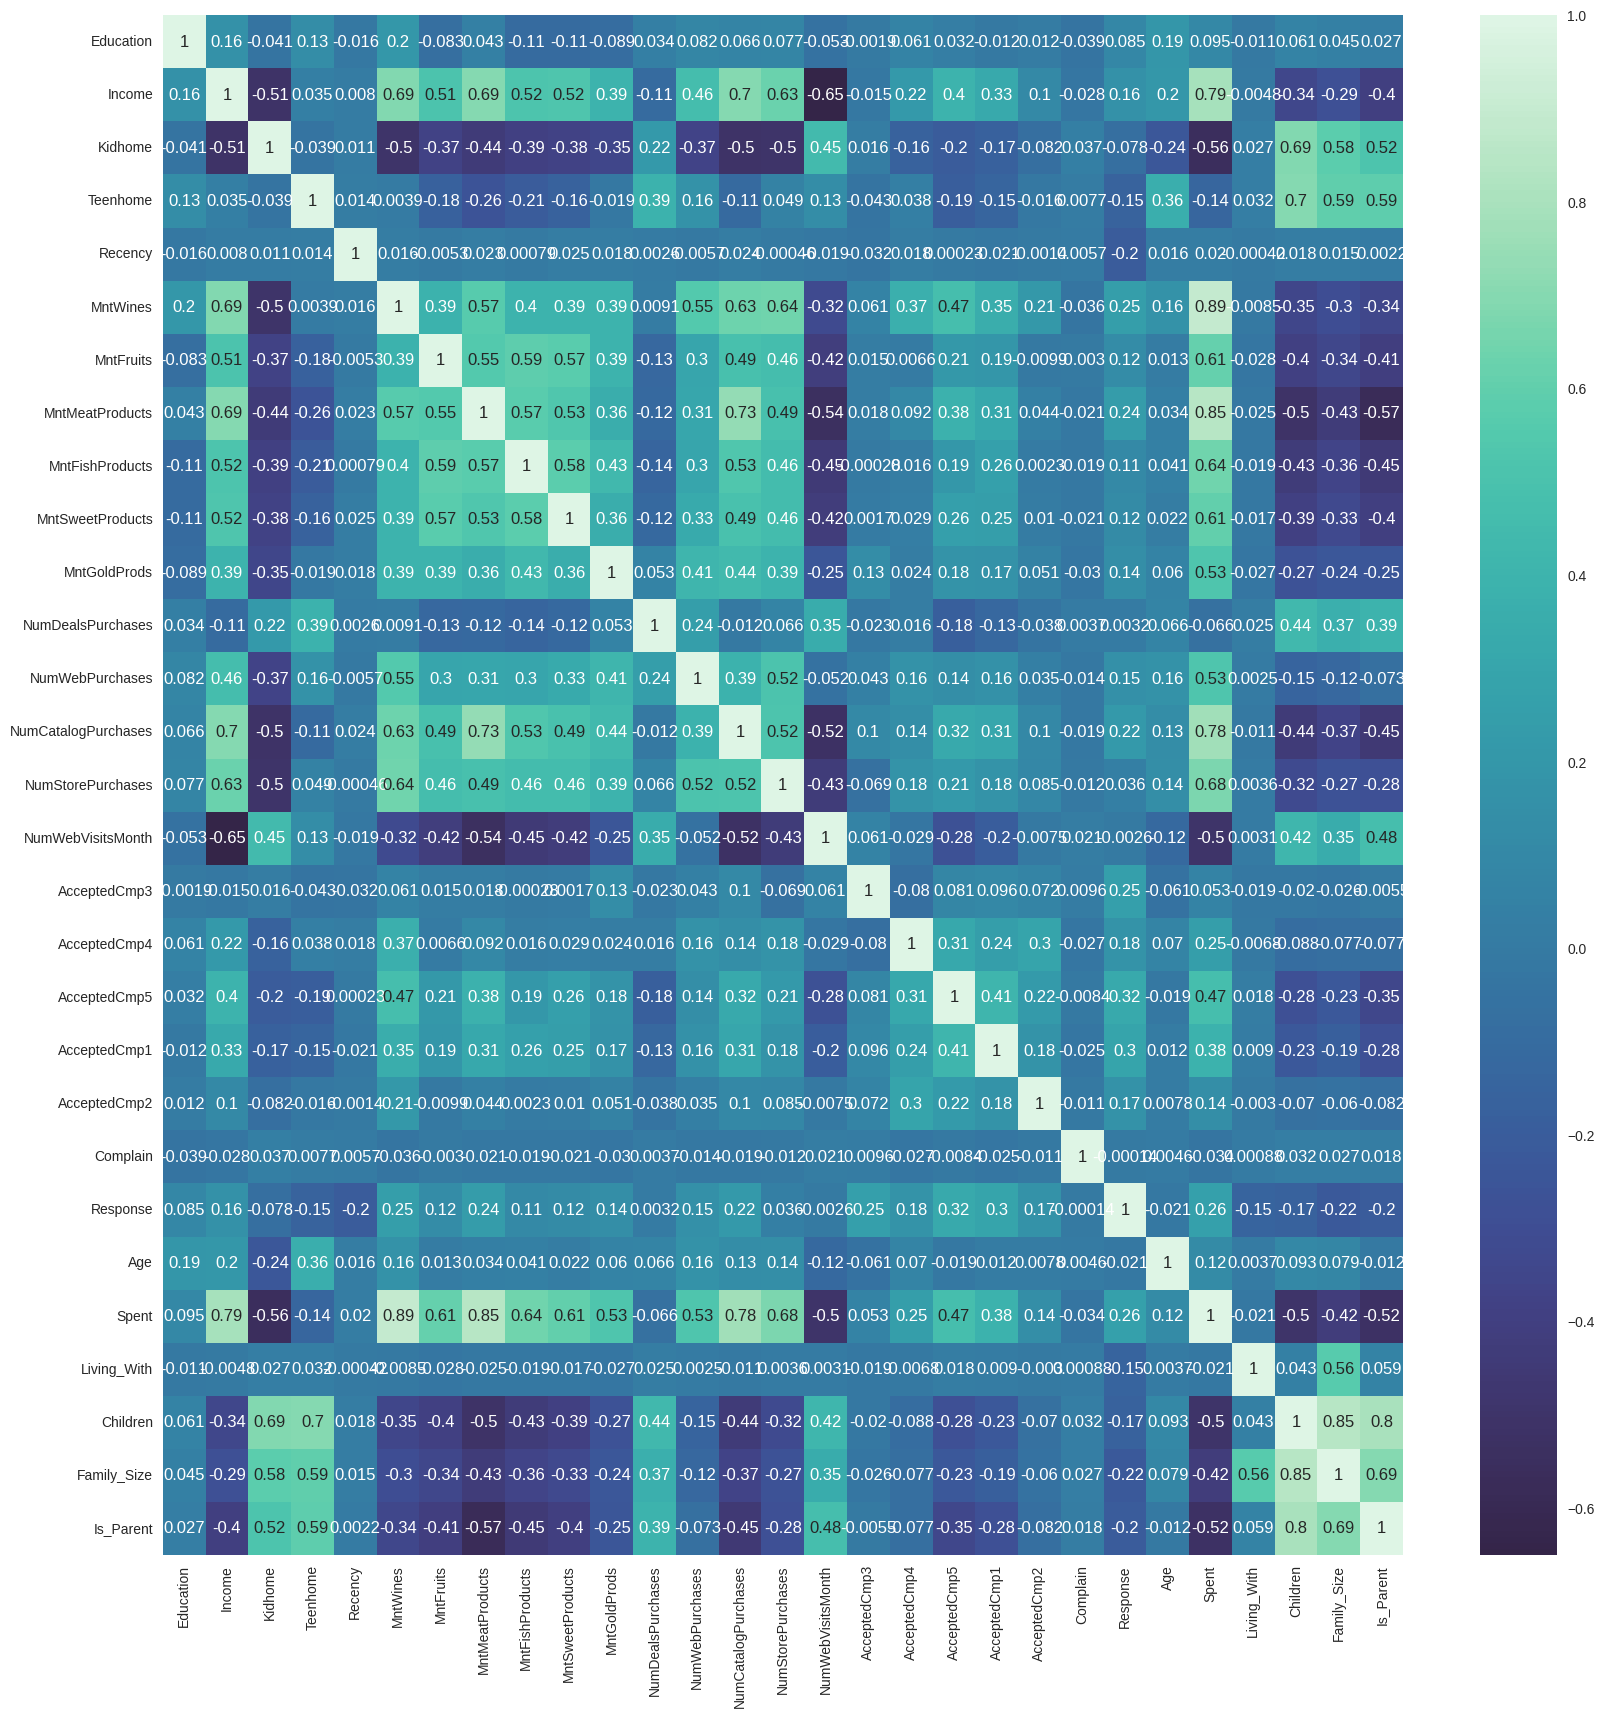

In [48]:
corrmat = data.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)

### 8. Feature Scaling

In [49]:

data_old = data.copy()

In [50]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)

In [51]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [52]:
data.head(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139


### 9. Dimensionality Reduction

In [53]:
p = PCA(n_components=3)
p.fit(data)


PCA(n_components=3)

In [54]:

W = p.components_.T
W


array([[ 1.13473473e-02,  1.40733147e-01, -5.05870695e-01],
       [ 2.79487075e-01,  1.78233975e-01, -7.58965256e-02],
       [-2.46222823e-01,  5.21580608e-03,  2.82172195e-01],
       [-9.87087428e-02,  4.62111896e-01, -1.50977096e-01],
       [ 3.52658293e-03,  1.62586903e-02,  3.59952027e-02],
       [ 2.55717023e-01,  2.09371445e-01, -1.16943967e-01],
       [ 2.38397999e-01,  1.10744430e-02,  2.55542179e-01],
       [ 2.85462104e-01,  9.92179252e-03,  7.65089748e-02],
       [ 2.48709647e-01,  2.26178410e-04,  2.52899964e-01],
       [ 2.37301895e-01,  2.16517451e-02,  2.58906629e-01],
       [ 1.88380383e-01,  1.23085209e-01,  1.99607300e-01],
       [-7.82600763e-02,  3.48734273e-01,  1.52950204e-01],
       [ 1.67559797e-01,  2.96785338e-01,  2.12898594e-02],
       [ 2.77349218e-01,  1.05979066e-01,  1.71595495e-02],
       [ 2.41542707e-01,  2.05457605e-01, -7.49734086e-03],
       [-2.25949422e-01,  4.61065964e-02,  9.15305486e-02],
       [ 3.84646684e-02,  2.34777703e-01

In [55]:

pd.DataFrame(W, index=data.columns, columns=['W1','W2','W3'])

,W1,W2,W3
Education,0.011347,0.140733,-0.505871
Income,0.279487,0.178234,-0.075897
Kidhome,-0.246223,0.005216,0.282172
Teenhome,-0.098709,0.462112,-0.150977
Recency,0.003527,0.016259,0.035995
MntWines,0.255717,0.209371,-0.116944
MntFruits,0.238398,0.011074,0.255542
MntMeatProducts,0.285462,0.009922,0.076509
MntFishProducts,0.248710,0.000226,0.252900
MntSweetProducts,0.237302,0.021652,0.258907


In [56]:

p.explained_variance_

array([8.27465625, 2.92091447, 1.43057205])

In [57]:

p.explained_variance_ratio_

array([0.3759507 , 0.13270882, 0.06499661])

In [58]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

,Explained Variability
1,0.375951
2,0.132709
3,0.064997


In [59]:
p.explained_variance_ratio_.cumsum()

array([0.3759507 , 0.50865952, 0.57365612])

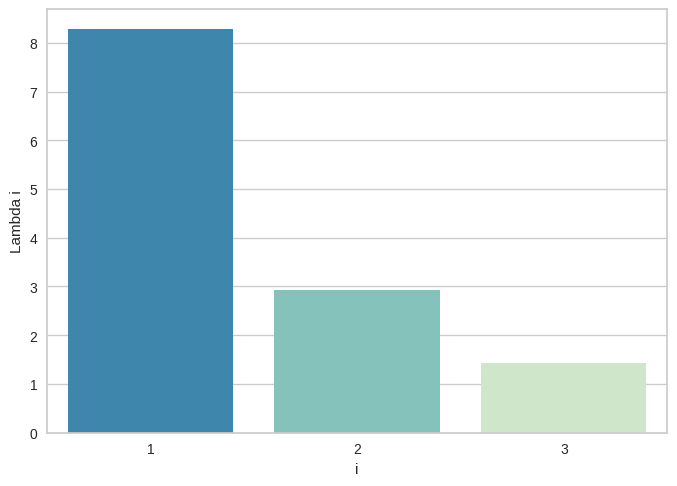

In [60]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [61]:
data_PCA = pd.DataFrame(p.transform(data), columns=(['col1', 'col2', 'col3']))

In [62]:

data_PCA.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.477621e-16,2.876570,-5.915030,-2.548037,-0.784932,2.418555,7.441146
col2,2212.0,-7.066881e-17,1.709068,-4.398465,-1.343412,-0.133292,1.243033,6.248169
col3,2212.0,1.284887e-17,1.196076,-3.543461,-0.864018,-0.016194,0.822197,5.039412


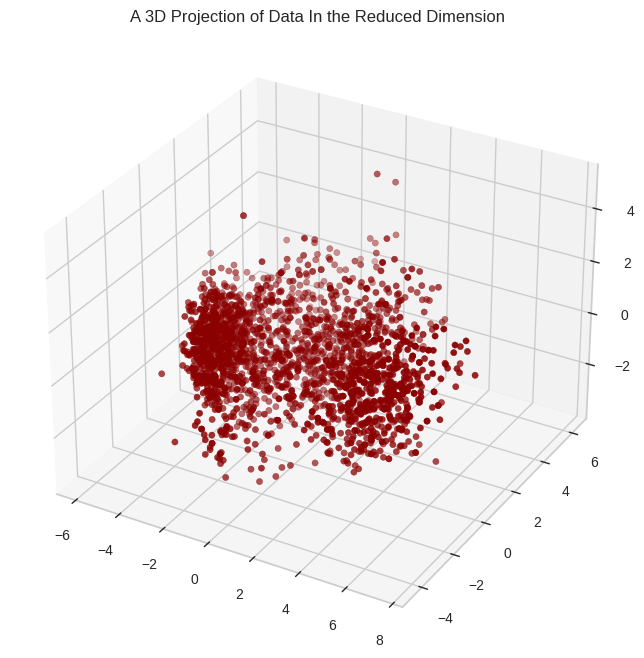

In [63]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

### 10. Clustering

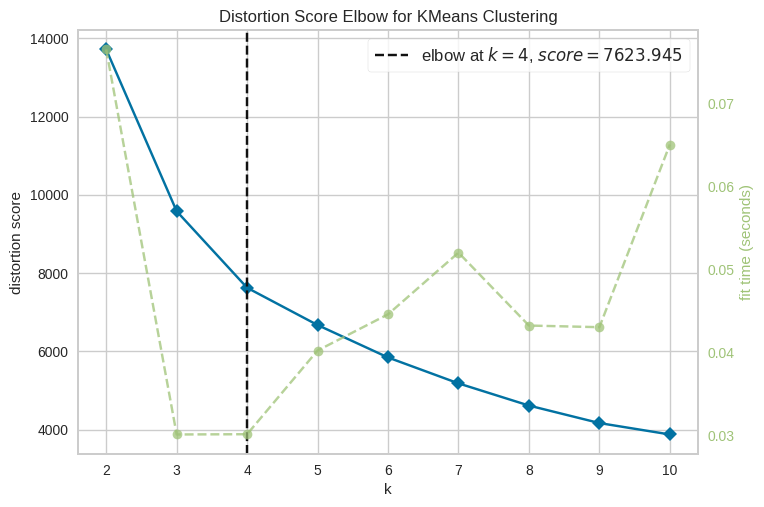

In [64]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_PCA)
Elbow_M.show();

In [65]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_PCA)
data_PCA['Clusters'] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data['Clusters'] = yhat_AC
data_old['Clusters'] = yhat_AC

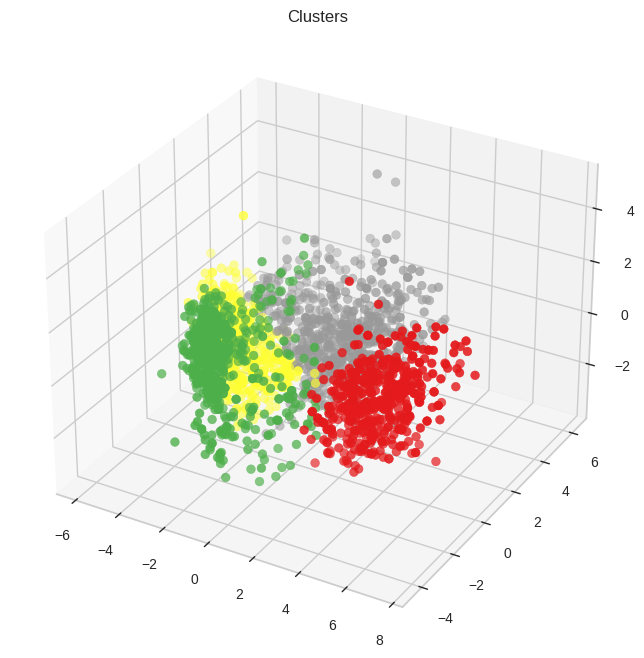

In [66]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=data_PCA['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

### 11.Clusters Analysis and Customers Profiling

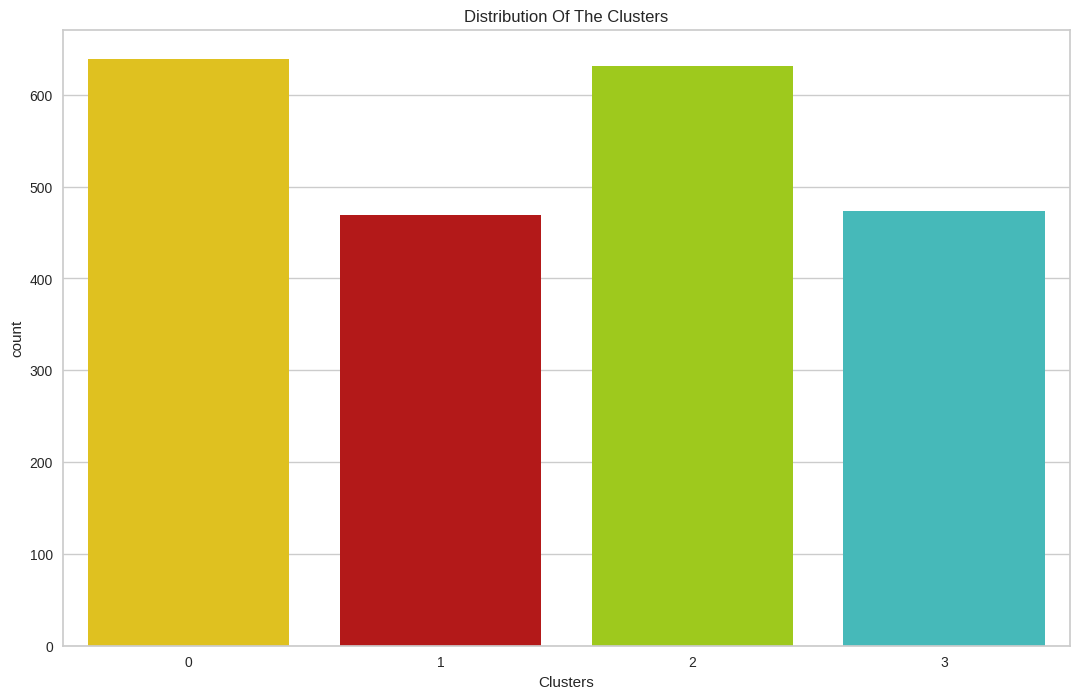

In [67]:

pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=data['Clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

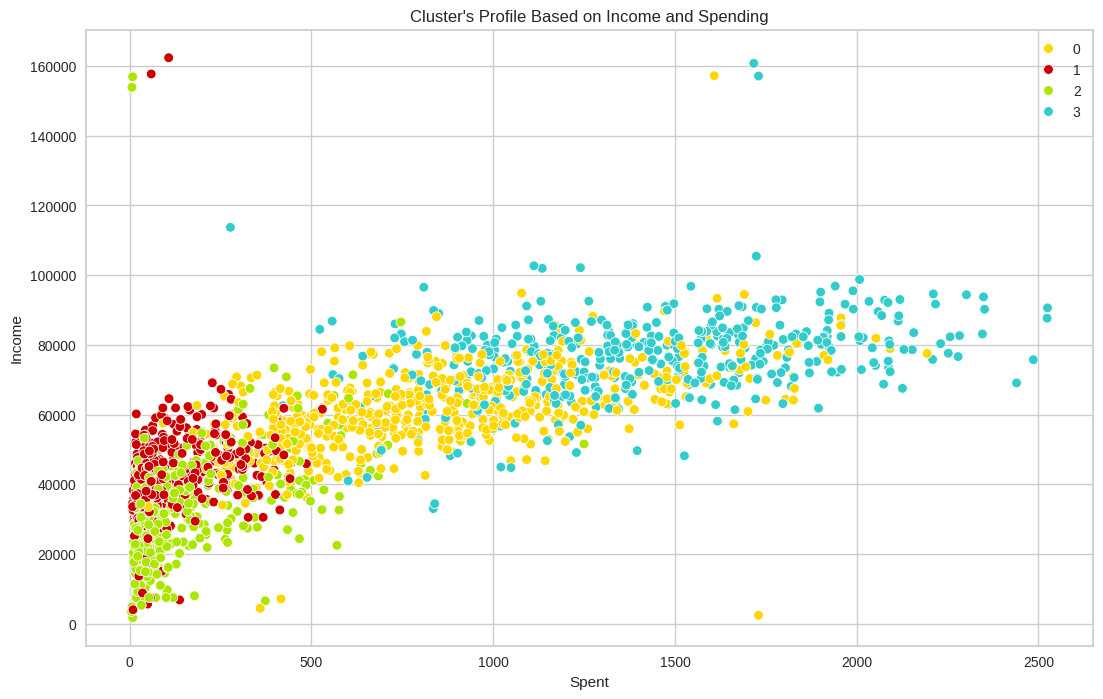

In [68]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=data_old, x=data_old['Spent'], y=data_old['Income'], hue=data_old['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

### Income vs spending plot shows the clusters pattern

### group 1: high spending & average income
### group 0: low spending & low income
### group 3: low spending & average income
### group 2: high spending & high income

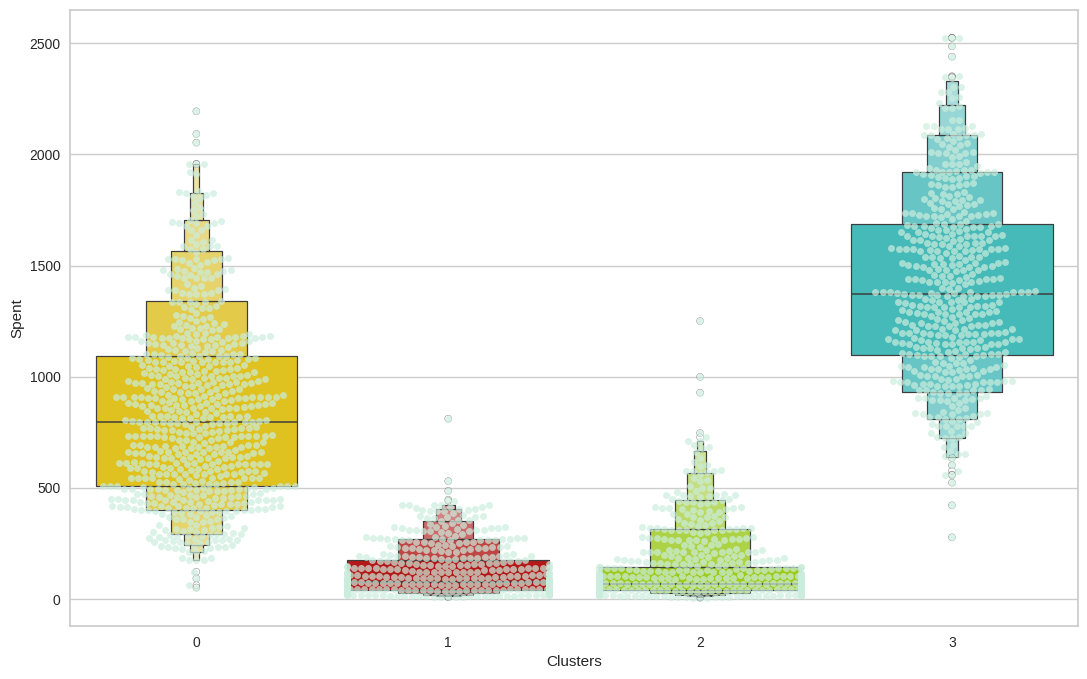

In [69]:

plt.figure(figsize=(13,8))
pl = sns.swarmplot(x=data_old['Clusters'], y=data_old['Spent'], color="#CBEDDD", alpha=0.7)
pl = sns.boxenplot(x=data_old['Clusters'], y=data_old['Spent'], palette=pal)
plt.show();

# From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 1. We can explore what each cluster is spending on for the targeted marketing strategies.

# Plotting count of total campaign accepted.

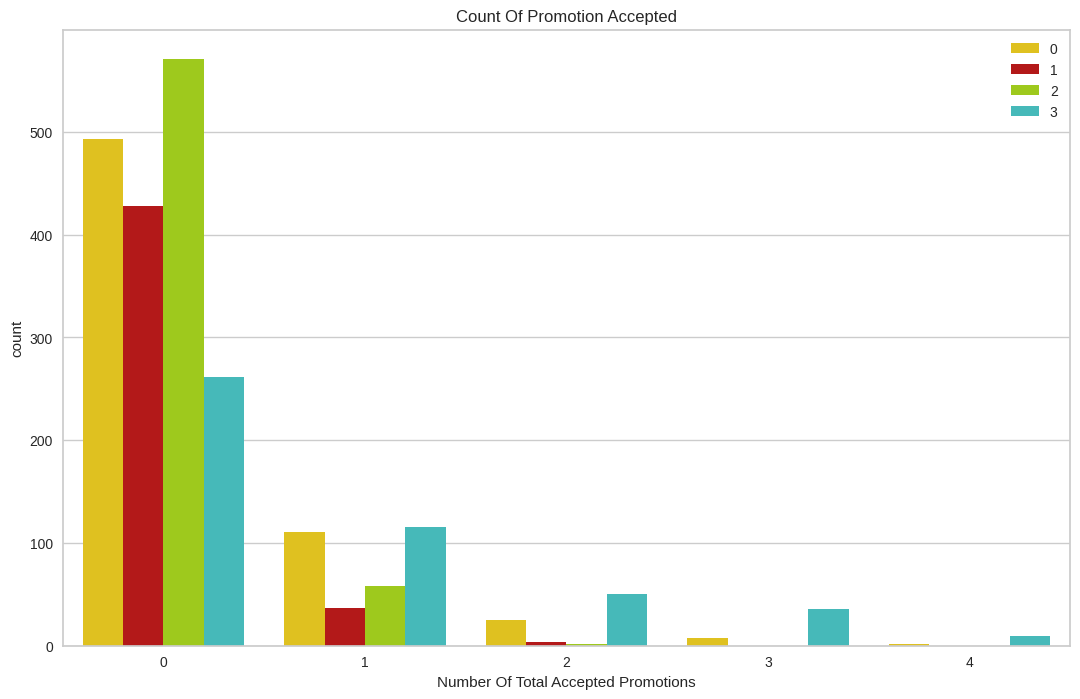

In [70]:
data_old['Total_Promos'] = data_old['AcceptedCmp1']+ data_old['AcceptedCmp2']+ data_old['AcceptedCmp3']+ data_old['AcceptedCmp4']+ data_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=data_old['Total_Promos'], hue=data_old['Clusters'], palette= pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

# There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

# Plotting the number of deals purchased

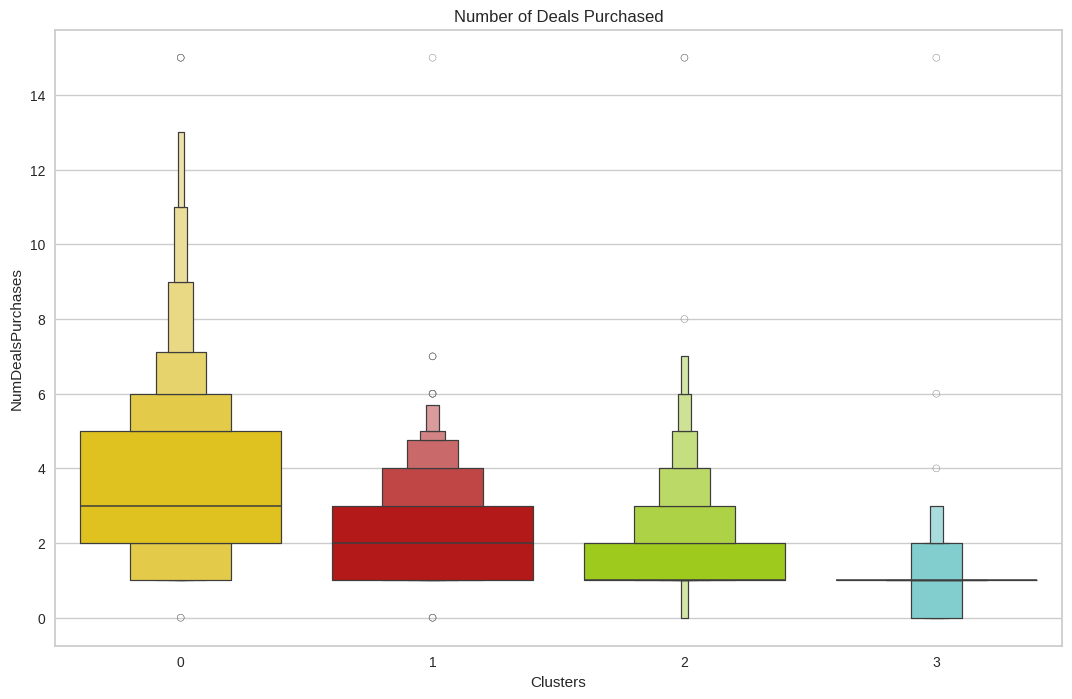

In [71]:

plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=data_old['NumDealsPurchases'],x=data_old['Clusters'], palette= pal)
pl.set_title('Number of Deals Purchased');


# Unlike campaigns, the deals offered did well. It has best outcome with cluster 1 and cluster 3. However, our star customers cluster 2 are not much into the deals. Nothing seems to attract cluster 0 overwhelmingly

<Figure size 1300x800 with 0 Axes>

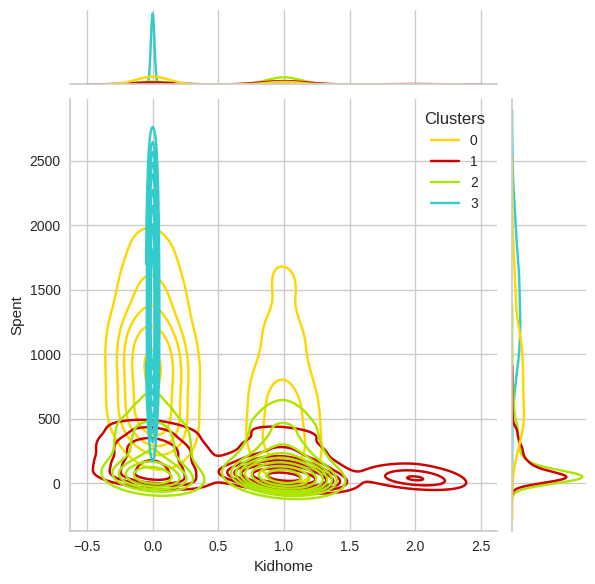

<Figure size 1300x800 with 0 Axes>

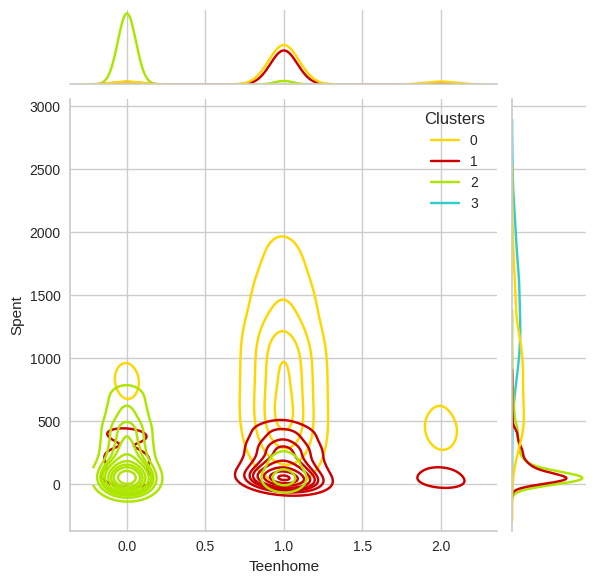

<Figure size 1300x800 with 0 Axes>

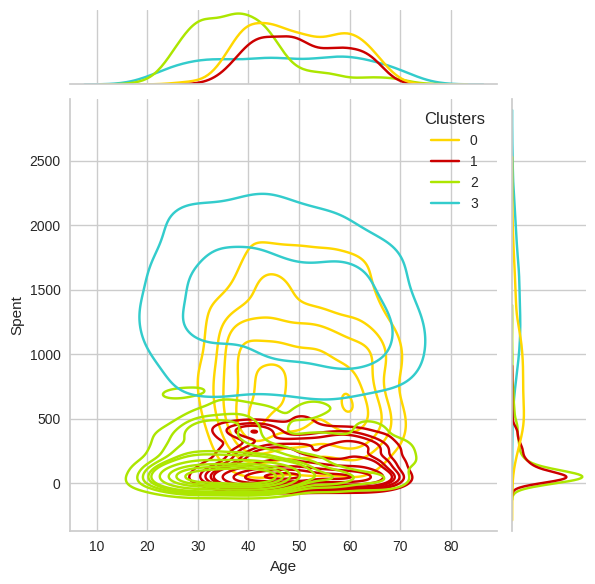

<Figure size 1300x800 with 0 Axes>

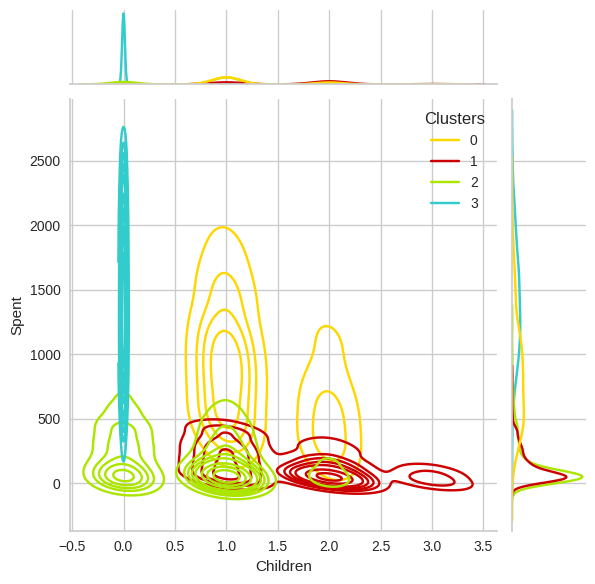

<Figure size 1300x800 with 0 Axes>

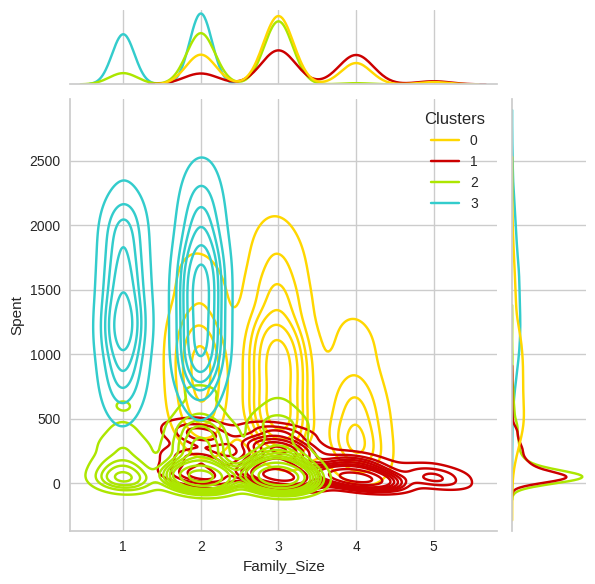

<Figure size 1300x800 with 0 Axes>

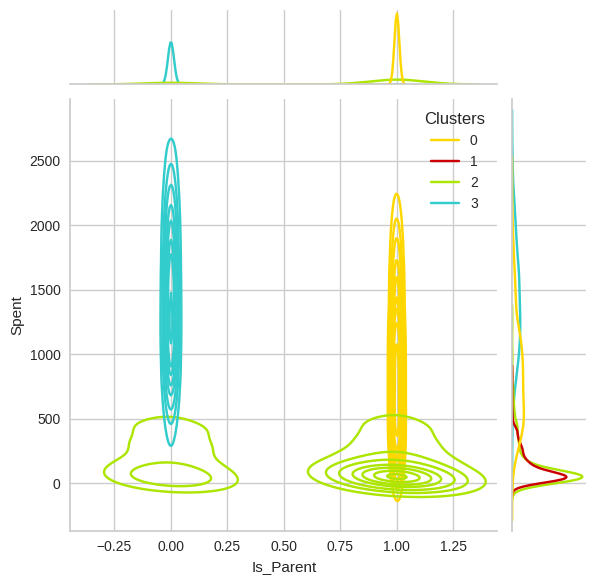

<Figure size 1300x800 with 0 Axes>

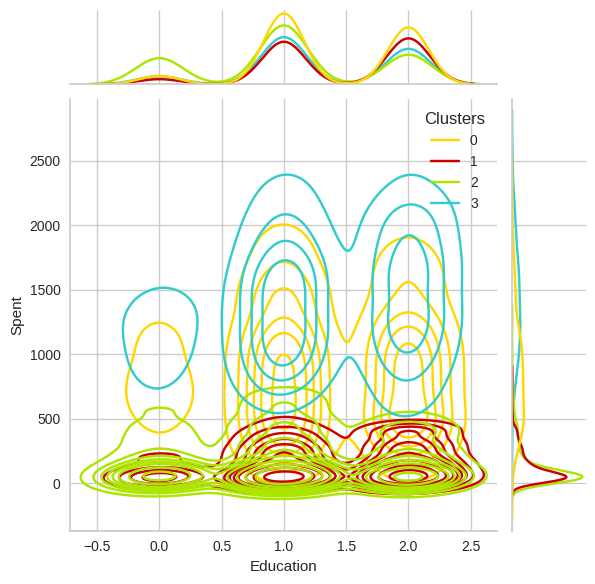

<Figure size 1300x800 with 0 Axes>

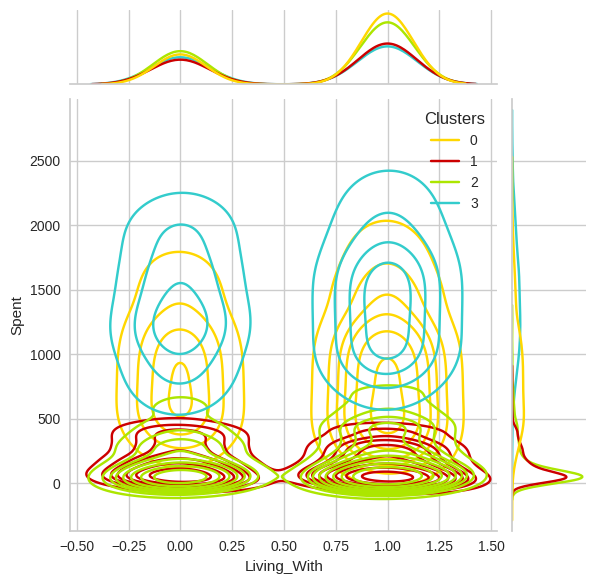

In [72]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=data_old[i], y=data_old['Spent'], hue=data_old['Clusters'], kind='kde', palette=pal);

About Cluster 0:

The majority of these people are parents
At max have 3 members in the family
They majorly have one kid and typically not tennagers
Relatively younger
About Cluster 1:

Definitely a parent
At max have 4 members in the family and at least 2
Most have a teeanger in home
Single parents are a subset of this group
Relatively older
About Cluster 2:

Definitely not a parent
At max are only 2 members in the family.
A slight majority of couples over single people
Span all ages
high income and high spending
About Cluster 3:

Definitely a parent
At max have 5 members in the family and at least 2
Majority of them have a teenager at home
